In [57]:
# Run this cell to set up the notebook, but please don't change it.
import numpy as np
import math
from datascience import *

# These lines set up the plotting functionality and formatting.
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [58]:
shoes = Table().read_table('Shoe Sales.csv')

In [59]:
shoes

Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11,California
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11,California
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11,California
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11,Rhode Island
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$798,$220,2/11/17,8.5,Michigan
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-White,$784,$220,12/17/16,11,California
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,$460,$220,4/29/17,10,New York
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,$465,$220,4/29/17,11,Kansas
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,$465,$220,4/29/17,11,Florida


In [60]:
sneakernames = shoes.group('Sneaker Name')

In [61]:
sneakernames.show()

Sneaker Name,count
Adidas-Yeezy-Boost-350-Low-Moonrock,100
Adidas-Yeezy-Boost-350-Low-Oxford-Tan,70
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015,95
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016,122
Adidas-Yeezy-Boost-350-Low-Turtledove,68
Adidas-Yeezy-Boost-350-Low-V2-Beluga,498
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,10395
Adidas-Yeezy-Boost-350-V2-Blue-Tint,9297
Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,225
Adidas-Yeezy-Boost-350-V2-Core-Black-Green,196


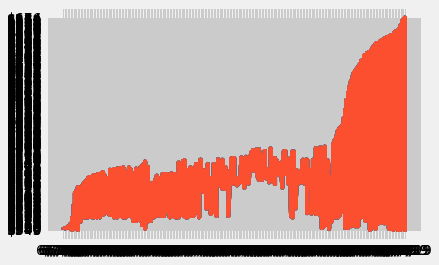

In [62]:
def get_row(sneaker):
    return shoes.where('Sneaker Name', are.containing(sneaker))

def plotit(sneaker):
    row = shoes.where('Sneaker Name', are.containing('adidas')).where('Shoe Size', are.below(7))
    x = row.column('Order Date')
    y = row.column('Sale Price')
    plots.plot(x, y)

for name in sneakernames.column(0)[0:20]:
    plotit(name)
    
    

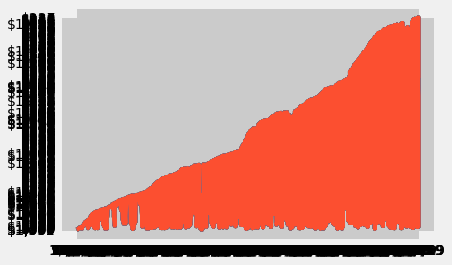

In [63]:
def get_row(sneaker):
    return shoes.where('Sneaker Name', are.containing(sneaker))

def plotit(sneaker):
    row = shoes.where('Sneaker Name', are.containing('Nike')).where('Shoe Size', are.below(7))
    x = row.column('Order Date')
    y = row.column('Sale Price')
    plots.plot(x, y)

for name in sneakernames.column(0)[0:20]:
    plotit(name)

In [64]:
shoes.column(2)

array(['Adidas-Yeezy-Boost-350-Low-V2-Beluga',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Copper',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Green', ...,
       'adidas-Yeezy-Boost-350-V2-Static-Reflective',
       'adidas-Yeezy-Boost-350-V2-Static-Reflective',
       'adidas-Yeezy-Boost-350-V2-Static-Reflective'], dtype='<U49')

In [50]:
shoedict = {}
counter = 0
for shoe in shoes.column(2):
    colors_list = []
    shoe_list = shoe.split("-")
    for char in shoe_list:
        if char in colors and 'Off' not in colors:
            colors_list.append(char)
    shoedict[counter] = colors_list
    counter += 1
        


In [51]:
colors = ['Beluga','Cream', 'White','Copper','Green','Red','Zebra','Black','Moonrock','Chicago','Tan','Turtledove','Blue','Yellow','Butter','Sesame','Static','Reflective','Desert','University','Volt','Pink','Silver','Eve','Rose','Menta','Reaper','Orange']

In [52]:
shoedict

{0: ['Beluga'],
 1: ['Black', 'Copper'],
 2: ['Black', 'Green'],
 3: ['Black', 'Red'],
 4: ['Black', 'Red'],
 5: ['Black', 'Red'],
 6: ['Black', 'White'],
 7: ['Cream', 'White'],
 8: ['Cream', 'White'],
 9: ['Cream', 'White'],
 10: ['Cream', 'White'],
 11: ['Cream', 'White'],
 12: ['Cream', 'White'],
 13: ['Zebra'],
 14: ['Zebra'],
 15: ['Zebra'],
 16: ['Zebra'],
 17: ['Zebra'],
 18: ['Zebra'],
 19: ['Zebra'],
 20: ['Zebra'],
 21: ['Zebra'],
 22: ['Zebra'],
 23: ['Beluga'],
 24: ['Black', 'Red'],
 25: ['Black', 'Red'],
 26: ['Black', 'Red'],
 27: ['Black', 'White'],
 28: ['Cream', 'White'],
 29: ['Cream', 'White'],
 30: ['Cream', 'White'],
 31: ['Zebra'],
 32: ['Zebra'],
 33: ['Zebra'],
 34: ['Zebra'],
 35: ['Zebra'],
 36: ['Zebra'],
 37: ['Zebra'],
 38: ['Beluga'],
 39: ['Black', 'Red'],
 40: ['Black', 'Red'],
 41: ['Black', 'Red'],
 42: ['Black', 'White'],
 43: ['Black', 'White'],
 44: ['Cream', 'White'],
 45: ['Cream', 'White'],
 46: ['Cream', 'White'],
 47: ['Cream', 'White'],
 48:

In [54]:
shoes = shoes.with_column('Colors', shoedict.values())

In [56]:
shoes.show(1000)

Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Colors
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11,California,['Beluga']
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11,California,"['Black', 'Copper']"
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11,California,"['Black', 'Green']"
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky,"['Black', 'Red']"
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11,Rhode Island,"['Black', 'Red']"
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$798,$220,2/11/17,8.5,Michigan,"['Black', 'Red']"
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-White,$784,$220,12/17/16,11,California,"['Black', 'White']"
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,$460,$220,4/29/17,10,New York,"['Cream', 'White']"
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,$465,$220,4/29/17,11,Kansas,"['Cream', 'White']"
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,$465,$220,4/29/17,11,Florida,"['Cream', 'White']"


In [93]:
versions = ['V1', 'V2', 'V3', '90', '1', '91', '92', '93', '94', '95', '96', '97', '98', '99',"VaporMax", 'Presto', 'Blazer',"Hyperdunk", 'Zoom']
versiondict = {}
counter = 0
for shoe in shoes.column(2):
    colors_list = []
    shoe_list = shoe.split("-")
    for char in shoe_list:
        if char in versions:
            colors_list.append(char)
        if char == "Yeezy" and 'V2' not in shoe_list:
            colors_list.append('V1')
        
    versiondict[counter] = colors_list
    counter += 1
        


In [94]:
versiondict

{0: ['V2'],
 1: ['V2'],
 2: ['V2'],
 3: ['V2'],
 4: ['V2'],
 5: ['V2'],
 6: ['V2'],
 7: ['V2'],
 8: ['V2'],
 9: ['V2'],
 10: ['V2'],
 11: ['V2'],
 12: ['V2'],
 13: ['V2'],
 14: ['V2'],
 15: ['V2'],
 16: ['V2'],
 17: ['V2'],
 18: ['V2'],
 19: ['V2'],
 20: ['V2'],
 21: ['V2'],
 22: ['V2'],
 23: ['V2'],
 24: ['V2'],
 25: ['V2'],
 26: ['V2'],
 27: ['V2'],
 28: ['V2'],
 29: ['V2'],
 30: ['V2'],
 31: ['V2'],
 32: ['V2'],
 33: ['V2'],
 34: ['V2'],
 35: ['V2'],
 36: ['V2'],
 37: ['V2'],
 38: ['V2'],
 39: ['V2'],
 40: ['V2'],
 41: ['V2'],
 42: ['V2'],
 43: ['V2'],
 44: ['V2'],
 45: ['V2'],
 46: ['V2'],
 47: ['V2'],
 48: ['V2'],
 49: ['V2'],
 50: ['V2'],
 51: ['V2'],
 52: ['V2'],
 53: ['V2'],
 54: ['V2'],
 55: ['V2'],
 56: ['V2'],
 57: ['V2'],
 58: ['V2'],
 59: ['V2'],
 60: ['V2'],
 61: ['V2'],
 62: ['V2'],
 63: ['V2'],
 64: ['V2'],
 65: ['V2'],
 66: ['V2'],
 67: ['V2'],
 68: ['V2'],
 69: ['V2'],
 70: ['V2'],
 71: ['V2'],
 72: ['V2'],
 73: ['V2'],
 74: ['V2'],
 75: ['V2'],
 76: ['V2'],
 77: ['V2

In [95]:
versionstuff = []

for x in versiondict.values():
    if len(x) == 1:
        versionstuff.append(x[0])
    else:
    
        versionstuff.append(0) 


shoes = shoes.with_column('Version', versionstuff) 

In [96]:
shoes.show(3000)

Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Version
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11,California,V2
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11,California,V2
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11,California,V2
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky,V2
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11,Rhode Island,V2
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$798,$220,2/11/17,8.5,Michigan,V2
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-White,$784,$220,12/17/16,11,California,V2
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,$460,$220,4/29/17,10,New York,V2
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,$465,$220,4/29/17,11,Kansas,V2
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,$465,$220,4/29/17,11,Florida,V2
